In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [4]:
def dichotomy(f, eps, l, r):
    while (r - l > eps):
        x1 = (l + r) / 2 - eps / 4
        x2 = (l + r) / 2 + eps / 4
        if (f(x1) > f(x2)):
            l = x1
        else:
            r = x2
    return (l + r) / 2

In [5]:
coef = (3 - math.sqrt(5)) / 2
def golden_ratio(f, eps, l, r):
    s, t = False, False
    fx1, fx2 = 0, 0
    while (r - l > eps):
        x1 = l + coef * (r - l)
        x2 = r - coef * (r - l)
        if (not s):
            fx1 = f(x1)
        if (not t):
            fx2 = f(x2)
        if (fx1 > fx2):
            l = x1
            s = True
            t = False
            fx1 = fx2
        else:
            r = x2
            s = False
            t = True
            fx2 = fx1
    return (l + r) / 2

In [6]:
def fibonacci(f, eps, l, r):
    if (r - l < eps):
        return (l + r) / 2
    fib = list([0, 1])
    n = 0
    while (True):
        fibi = fib[n] + fib[n + 1]
        fib.append(fibi)
        if (fibi * eps > r - l):
            break
        n += 1
    s, t = False, False
    fx1, fx2 = 0, 0
    while (n > 0):
        x1 = l + fib[n] / fib[n + 2] * (r - l)
        x2 = l + fib[n + 1] / fib[n + 2] * (r - l)
        if (not s):
            fx1 = f(x1)
        if (not t):
            fx2 = f(x2)
        if (fx1 > fx2):
            l = x1
            s = True
            t = False
            fx1 = fx2
        else:
            r = x2
            s = False
            t = True
            fx2 = fx1
        n -= 1
    return (l + r) / 2

In [145]:
def gradient_descent(f, x0, eps, delta, alpha, step_search=None):
    alpha0 = alpha
    x = x0
    data = list([])
    data.append([x[i] if (i < x.shape[0]) else f(x) for i in range(x.shape[0] + 1)])
    while (True):
        grad = np.zeros(x.shape[0])
        for i in range(x.shape[0]):
            h = np.zeros(x.shape[0])
            h[i] = delta
            grad[i] = (f(x + h) - f(x)) / delta
        x_new = np.copy(x)
        if (step_search is not None):
            def g(y):
                return f(x - y * grad)
            x_new -= step_search(g, eps, 0, alpha) * grad
        else:
            x_new -= alpha * grad
        if (np.linalg.norm(x_new - x) < eps):
            break
        x = x_new
        data.append([x[i] if (i < x.shape[0]) else f(x) for i in range(x.shape[0] + 1)])
        alpha /= 2
        if (len(data) % 100 == 0):
            alpha = alpha0
    return x, np.array(data)

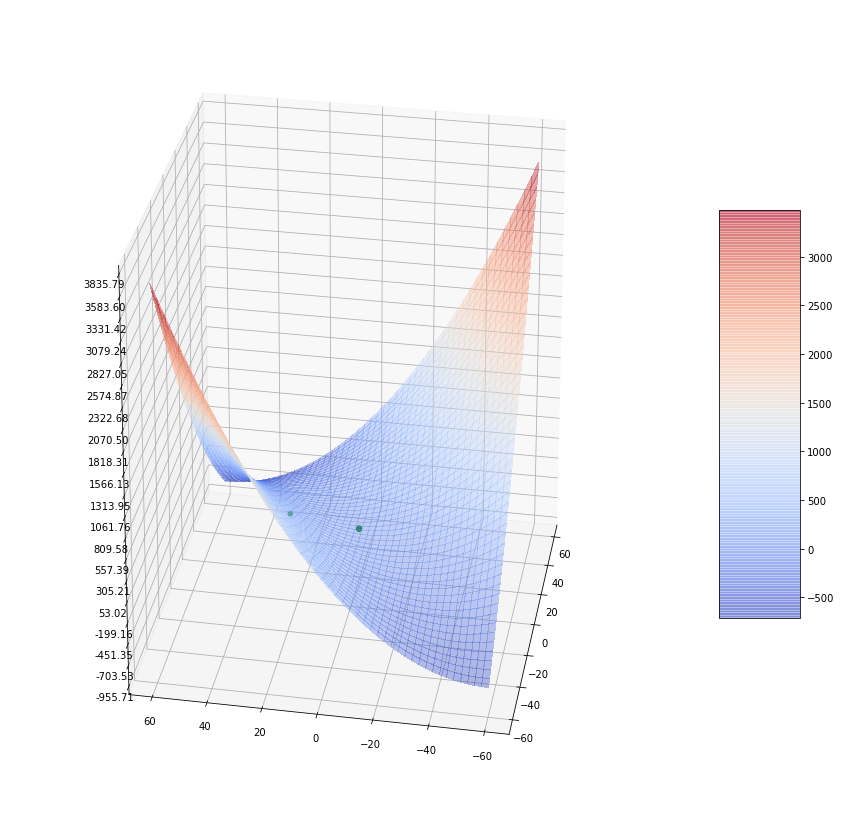

In [199]:
def f(x):
    return (x[0] ** 2 + 3 * x[1] ** 2 - 6 * x[0] * x[1] - 5 * x[0] + x[1]) / 10

fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
X = np.arange(-60, 60, 0.25)
Y = np.arange(-60, 60, 0.25)
X, Y = np.meshgrid(X, Y)
Z = f([X, Y])
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.4, linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(20))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
res, data = gradient_descent(f, np.array([-19, 19], dtype='float'), 1e-6, 1e-6, 1)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='green', s=20)
ax.view_init(25, 190)
plt.show()

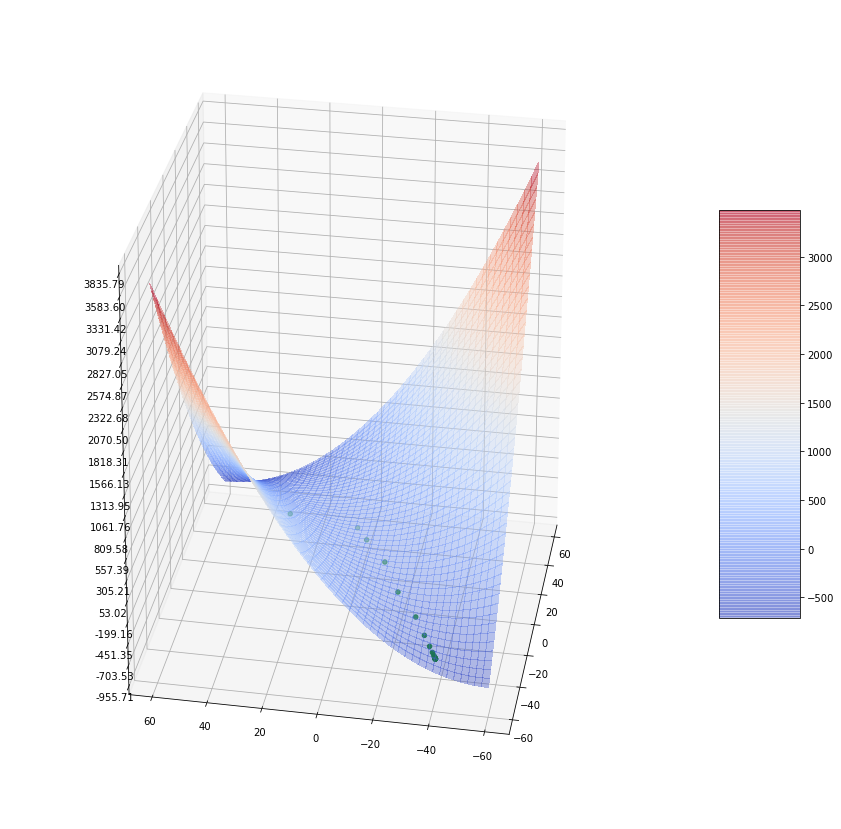

In [173]:
def f(x):
    return (x[0] ** 2 + 3 * x[1] ** 2 - 6 * x[0] * x[1] - 5 * x[0] + x[1]) / 10

fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
X = np.arange(-60, 60, 0.25)
Y = np.arange(-60, 60, 0.25)
X, Y = np.meshgrid(X, Y)
Z = f([X, Y])
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.4, linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(20))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
res, data = gradient_descent(f, np.array([-19, 19], dtype='float'), 1e-6, 1e-6, 20, step_search=fibonacci)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='green', s=20)
ax.view_init(25, 190)
plt.show()

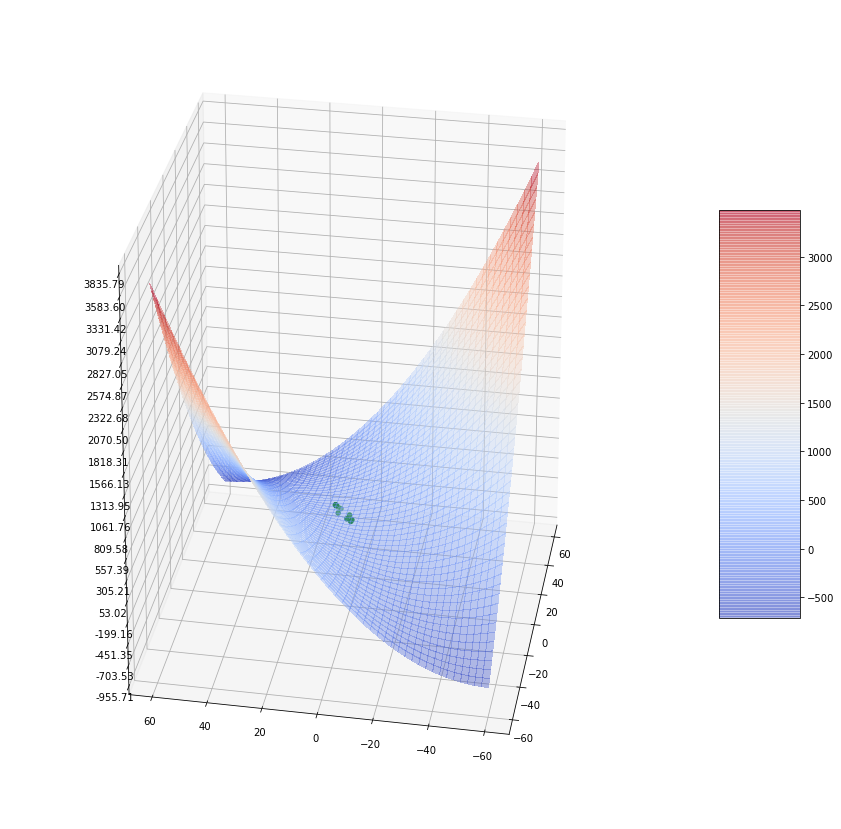

In [176]:
def f(x):
    return (x[0] ** 2 + 3 * x[1] ** 2 - 6 * x[0] * x[1] - 5 * x[0] + x[1]) / 10

fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
X = np.arange(-60, 60, 0.25)
Y = np.arange(-60, 60, 0.25)
X, Y = np.meshgrid(X, Y)
Z = f([X, Y])
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.4, linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(20))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
res, data = gradient_descent(f, np.array([0, 0], dtype='float'), 1e-6, 1e-6, 20, step_search=fibonacci)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='green', s=20)
ax.view_init(25, 190)
plt.show()

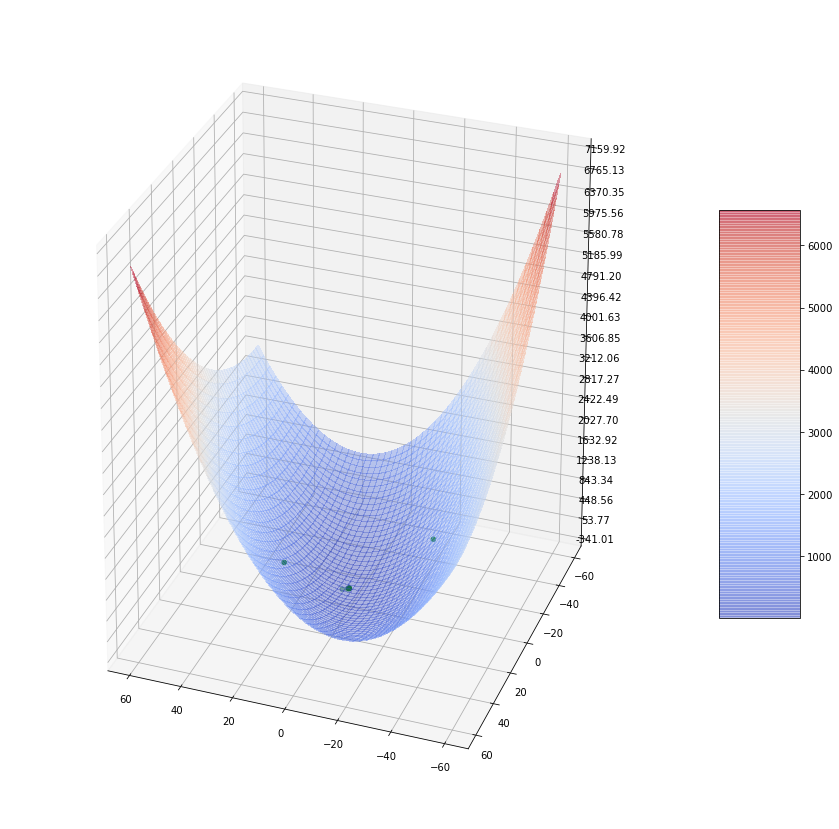

In [200]:
def f(x):
    return (10 * x[0] ** 2 + 3 * x[1] ** 2 + 6 * x[0] * x[1] + 5 * x[0] + x[1]) / 10

fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
X = np.arange(-60, 60, 0.25)
Y = np.arange(-60, 60, 0.25)
X, Y = np.meshgrid(X, Y)
Z = f([X, Y])
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.4, linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(20))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
res, data = gradient_descent(f, np.array([19, 19], dtype='float'), 1e-6, 1e-6, 1)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='green', s=20)
ax.view_init(25, 110)
plt.show()

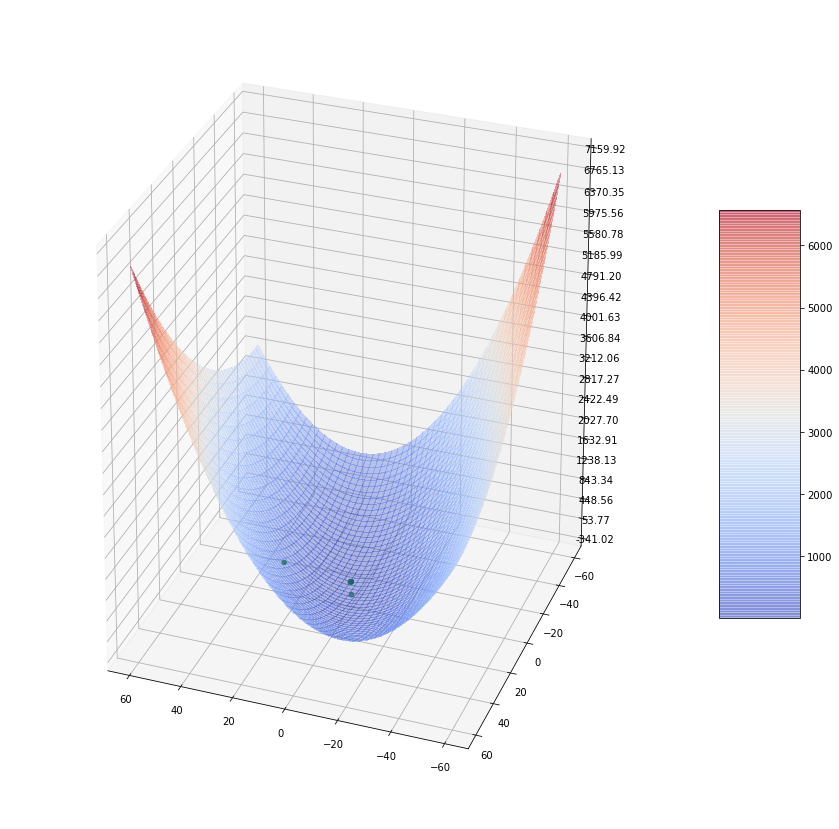

In [185]:
def f(x):
    return (10 * x[0] ** 2 + 3 * x[1] ** 2 + 6 * x[0] * x[1] + 5 * x[0] + x[1]) / 10

fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
X = np.arange(-60, 60, 0.25)
Y = np.arange(-60, 60, 0.25)
X, Y = np.meshgrid(X, Y)
Z = f([X, Y])
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.4, linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(20))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
res, data = gradient_descent(f, np.array([19, 19], dtype='float'), 1e-6, 1e-6, 20, step_search=fibonacci)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='green', s=20)
ax.view_init(25, 110)
plt.show()

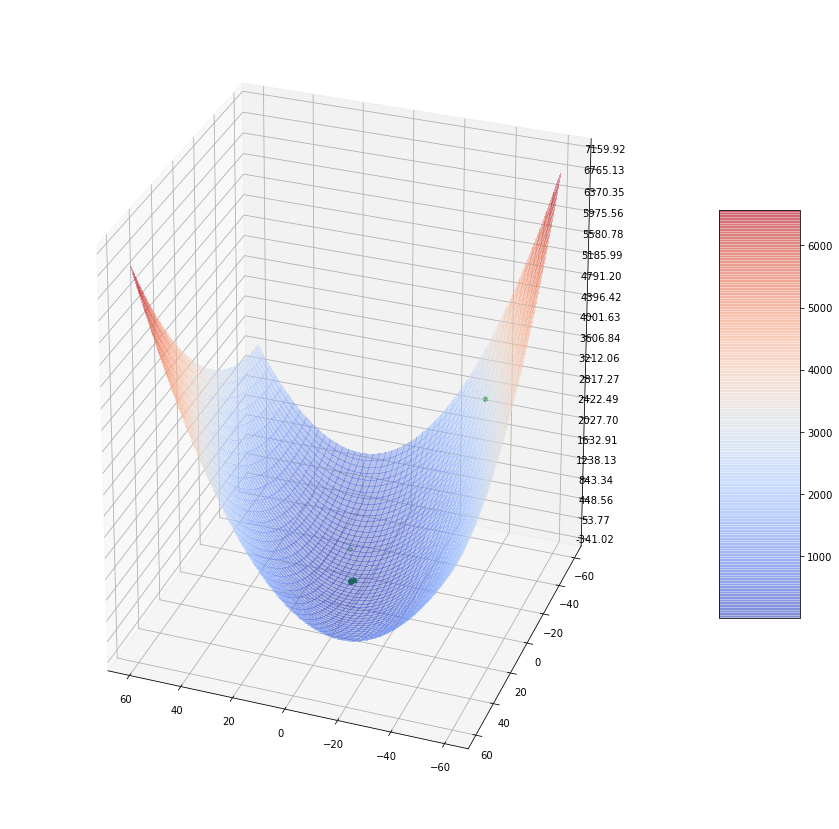

In [187]:
def f(x):
    return (10 * x[0] ** 2 + 3 * x[1] ** 2 + 6 * x[0] * x[1] + 5 * x[0] + x[1]) / 10

fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
X = np.arange(-60, 60, 0.25)
Y = np.arange(-60, 60, 0.25)
X, Y = np.meshgrid(X, Y)
Z = f([X, Y])
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.4, linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(20))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
res, data = gradient_descent(f, np.array([-39, -39], dtype='float'), 1e-6, 1e-6, 20, step_search=fibonacci)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='green', s=20)
ax.view_init(25, 110)
plt.show()

In [192]:
def quadrant(k, n):
    X = np.zeros((n, n))
    Lambda = 1
    L = k
    for i in range(n):
        X[i][i] = np.random.uniform(Lambda / 2, L / 2)
    rnd = np.random.choice(n, 2, replace=False)
    X[rnd[0]][rnd[0]] = Lambda / 2
    X[rnd[1]][rnd[1]] = L / 2
    for i in range(n):
        for j in range(i + 1, n):
            X[i][j] = X[j][i] = np.sqrt((2 * X[i][i] - Lambda) * (2 * X[j][j] - Lambda)) / 2
    Y = np.random.uniform(-L, L, n)
    z = np.random.uniform(-L, L)
    def f(x):
        return x.dot(X).dot(x) + Y.dot(x) + z
    return f

In [213]:
for k in range(0, 20):
    print("k = ", 1.5 ** k, ":", sep='')
    for n in range(2, 21):
        f = quadrant(1.5 ** k, n)
        res, data = gradient_descent(f, np.ones(n) * (1.5 ** k), 1e-6, 1e-6, 1, step_search=fibonacci)
        print(data.shape[0] - 1)
    print()  

k = 1.0:
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2

k = 1.5:
17
18
18
18
18
19
19
19
19
19
19
19
19
19
19
19
19
19
19

k = 2.25:
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
21
19
19

k = 3.375:
19
19
19
18
19
19
21
21
21
19
19
21
21
21
21
21
22
21
21

k = 5.0625:
18
21
19
19
21
21
21
22
21
21
22
21
22
22
22
22
22
22
22

k = 7.59375:
21
21
21
21
21
22
22
22
22
22
22
22
23
22
23
22
23
22
23

k = 11.390625:
22
22
21
23
23
22
23
22
22
23
23
22
23
22
23
23
23
23
23

k = 17.0859375:
21
23
23
23
23
23
24
22
23
23
23
23
24
24
24
24
24
24
24

k = 25.62890625:
23
24
24
24
24
24
23
24
24
24
24
24
24
24
24
24
24
24
24

k = 38.443359375:
21
24
24
24
24
24
25
25
24
25
24
25
25
25
26
25
25
25
25

k = 57.6650390625:
25
25
25
25
25
25
25
25
26
25
25
26
26
26
26
26
26
27
26

k = 86.49755859375:
25
24
24
25
26
26
27
26
26
26
27
27
26
27
26
27
27
27
28

k = 129.746337890625:
26
24
26
26
26
27
27
26
27
27
27
28
28
27
27
28
28
28
28

k = 194.6195068359375:
24
27
26
27
27
28
27
28
27
28
27
28
28
28
28
28
28
